In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt

2023-10-17 18:55:17.289610: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-17 18:55:18.532487: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
tf.config.list_physical_devices()

2023-10-17 18:55:20.502390: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-17 18:55:20.770821: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-17 18:55:20.771268: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
# print(len(x_train))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
x_train[1].shape

(28, 28)

In [7]:

x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))

x_train = x_train /255
x_test = x_test /255 


# x_train[1]


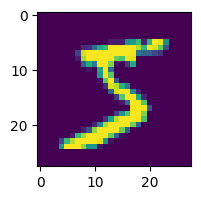

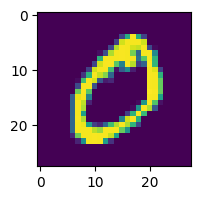

In [8]:
for i in range(2):
    plt.figure(figsize=(2,2))
    plt.imshow(x_train[i])
    plt.show()

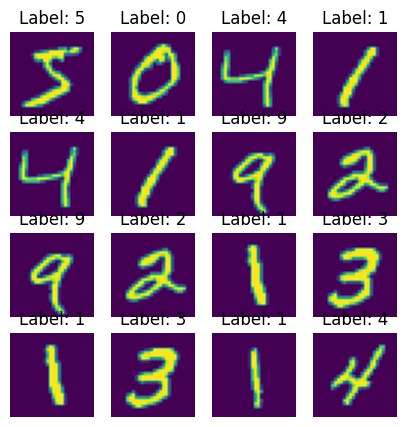

In [9]:
fig, axes = plt.subplots(4, 4, figsize=(5, 5))

for i in range(4):
    for j in range(4):
        axes[i, j].imshow(x_train[i * 2 + j])
        axes[i, j].set_title(f"Label: {y_train[i * 2 + j]}")

# Menyembunyikan nilai sumbu x dan y pada subplot
for ax in axes.flatten():
    ax.axis('off')

plt.show()

In [10]:
model = tf.keras.Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    #Kalau diberi layer tambahan maxpool lagi nanti habis wkwkw
    # Conv2D(96,(3,3),activation='relu'),
    # MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

2023-10-17 18:55:22.006029: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-17 18:55:22.006797: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-17 18:55:22.007136: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))
test_loss,test_acc = model.evaluate(x_test,y_test)
print(f'Accuracy on test data: {test_acc}')

Epoch 1/10


2023-10-17 18:55:23.438636: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-10-17 18:55:24.285962: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f9f82724150 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-17 18:55:24.286040: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-10-17 18:55:24.314911: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-17 18:55:24.471280: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 14s 6ms/step - loss: 0.1380 - accuracy: 0.9585 - val_loss: 0.0448 - val_accuracy: 0.9842
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0460 - accuracy: 0.9857 - val_loss: 0.0427 - val_accuracy: 0.9866
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0322 - accuracy: 0.9903 - val_loss: 0.0289 - val_accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0240 - accuracy: 0.9923 - val_loss: 0.0399 - val_accuracy: 0.9873
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0174 - accuracy: 0.9944 - val_loss: 0.0303 - val_accuracy: 0.9910
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0141 - accuracy: 0.9956 - val_loss: 0.0274 - val_accuracy: 0.9909
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0114 - accuracy: 0.9964 - val_loss: 0.0248 - val_accuracy: 0.9

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [12]:
test_loss,test_acc

(0.03300350904464722, 0.9919999837875366)

1/1 [==============================] - 0s 17ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

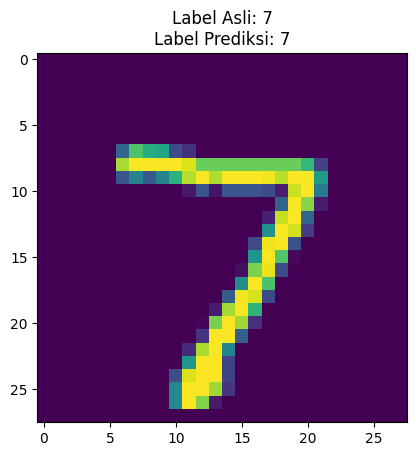

In [20]:
#Predict Our Data
import numpy as np 

idx = 0
gambar = x_test[idx]
label_ril = y_test[idx]

predict = model.predict(np.expand_dims(gambar,axis=0))
label = np.argmax(predict)

#Menampilkan gambar yang ktia prediksi
plt.imshow(x_test[idx])
plt.title(f"Label Asli: {label_ril}\nLabel Prediksi: {label}")
plt.show

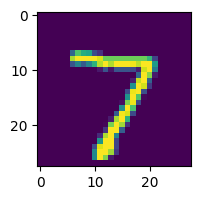

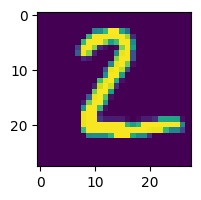

In [17]:

for i in range(2):
    plt.figure(figsize=(2,2))
    plt.imshow(x_test[i])
    plt.show()